Shyam Kumar Ray Yadav (18449154)

Sonu Kumar (15651099)

Ahmad Raza Khawaja (25848862)

# Problem sheet 8

## Exercise 8.1: intrinsic dimension and spectral embedding with the Laplace operator.

In this problem we study in more detail the apparent intrinsic dimension of point data with the spectral embedding via the Laplace operator.

1. First we generate an example dataset. Let $n_1$ = 25, $n_2$ = 20. Let $X$ be a set of $n_1 \cdot n_2$ points in $\mathbb{R}^2$, lying on a regular two-dimensional Cartesian grid with $n_1$ and $n_2$ points along the two axes, with distance 1 between points along each axis. So $X$ should be an array of shape ($n_1 \cdot n_2$) × 2. Generate X and compute the matrix $D$ of squared Euclidean distances between the points in $X$. $D$ should be of shape $(n_1 \cdot n_2)$ × $(n_1 · n_2)$.

In [213]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from PIL import Image

In [172]:
#Generate an example dataset.

n1 = 25
n2 = 20
x = np.linspace(0, n1-1, n1) #points on X-axis
y = np.linspace(0, n2-1, n2) #Points on Y-axis

#Generate a mesh grid of n1 points for the X-axis and n2 points for the Y-axis.
xx, yy = np.meshgrid(x, y)
print(xx, "\n", yy)

xx_ravel = xx.ravel() #Changing n1 grid points of X-axis from 2D to 1D.
yy_ravel = yy.ravel() #Changing n2 grid points of Y-axis from 2D to 1D.

X = np.vstack([xx_ravel, yy_ravel]).T #Stack 1D array as rows in 2D array and transform. 
print(f'The shape of pints lying on 2D Cartesian Grid:{X.shape}')

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 1

In [173]:
#Computation of distance matrix D.

num_of_points = n1*n2 #Number of points in the grid.

#Initialize the distance matrix D.
D = np.zeros((num_of_points, num_of_points))
print(D.shape)
print(D)

#Compute the squared Euclidean distance matrix
for i in range(num_of_points):
    for j in range(num_of_points):
        D[i,j] = np.sum((X[i] - X[j])**2)

print("First 5*5 block of the distance matrix D: \n", D[:5,:5])

(500, 500)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 5*5 block of the distance matrix D: 
 [[ 0.  1.  4.  9. 16.]
 [ 1.  0.  1.  4.  9.]
 [ 4.  1.  0.  1.  4.]
 [ 9.  4.  1.  0.  1.]
 [16.  9.  4.  1.  0.]]


2. In addition, create an array $c \in \mathbb{R}^{(n1 \cdot n2)×3}$, such that $c$[i,:] $\in$ $\mathbb{R}^3$ is an RGB color code that encodes the position of point $X$[i,:] $\in$ $\mathbb{R}^2$ in the grid. The exact choice of the encoding is up to you.

Answer: We can do the following steps to encode the position of X[i,:] $\in$ $\mathbb{R}^2$ in the grid to c $\in$ $\mathbb{R}^3$  as an RGB color code:

- Normalize the x and y coordinates to x and y to [0, 1] range.
- Use normalized x and y to RGB values. 


In [174]:
#Normalize the x and y coordinates of points on 2D cartesian grid. 
x_norm = (X[:, 0] - X[:, 0].min()) / (X[:,0].max() - X[:,0].min())
y_norm = (X[:, 1] - X[:, 1].min()) / (X[:, 1].max() - X[:,1].min())
print(x_norm.shape)
print(y_norm)


(500,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05263158 0.05263158 0.05263158 0.05263158 0.05263158
 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158
 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158
 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158
 0.05263158 0.05263158 0.10526316 0.10526316 0.10526316 0.10526316
 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316
 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316
 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316
 0.10526316 0.10526316 0.10526316 0.15789474 0.15789474 0.15789474
 0.15789474 0.15789474 0.15789474 0.15789474 0.15789474 0.15789474
 0.15789474 0.15789474 0.15789474 0.15789474 0.15789474 0.15789474
 0.15789474 0.157894

In [175]:
#Generation of RGB colors.
c = np.zeros((n1*n2, 3)) #Initializing 500 rows and 3 columns
c[:, 0] = x_norm #Mapping x_norm to firt column of c as red color.
c[:, 1] = y_norm #Mapping y_norm to second column of c as green color.
c[:, 2] = (x_norm + y_norm) / 2 #Mapping the average of x_norm and y_norm to third column of c as blue color.
print(f"Frist 5 rows of c(RGB) values: {c[:5]}")

Frist 5 rows of c(RGB) values: [[0.         0.         0.        ]
 [0.04166667 0.         0.02083333]
 [0.08333333 0.         0.04166667]
 [0.125      0.         0.0625    ]
 [0.16666667 0.         0.08333333]]


3. Based on the squared distances and the length scale parameter $\epsilon$ =1, compute now the matrix $A$, defined as follows: $A_{i,j}$ = $\exp{(−D_{i,j}/\epsilon^2)}$ for $i \neq j$, $A_{i,i}$ = 0. Then from $A$ generate the graph Laplacian $L$ and its eigendecomposition, as in the lecture.

In [176]:
#Caculating Affinity Matrix A.
epsilon = 1 #as we are dealing with unit Euclidean distances. 
A = np.exp(-D/(epsilon**2))
np.fill_diagonal(A,0) #Ensure the diagonal is zero.

#Caculating the degree matrix for Graph Laplacian.
degree_matrix = np.diag(np.sum(A, axis =1)) #Summing the diagonal of the column of degree matrix. 

#Computing Graph Labpalcian
L = degree_matrix - A

#Performing the eigendecomposition
eigen_values,eigen_vector = eigh(L)
print("Eigenvalues:\n", eigen_values)
print("Eigenvectors:\n", eigen_vector)
print(eigen_values.shape)
print(eigen_vector.shape)

Eigenvalues:
 [0.         0.01206843 0.01891872 0.03028248 0.04793182 0.06510581
 0.07482244 0.08493252 0.10657121 0.11932506 0.12202513 0.1651582
 0.1732439  0.17549162 0.18629841 0.19941156 0.2072951  0.25219074
 0.26189542 0.28473256 0.28568308 0.29122311 0.29510896 0.32585827
 0.33645287 0.34772924 0.37832577 0.39902784 0.40630011 0.42909147
 0.43046795 0.43353668 0.44986845 0.4601874  0.47135327 0.52067795
 0.52541084 0.53013325 0.53837331 0.53905496 0.58720328 0.5886022
 0.59212791 0.59357421 0.63947361 0.64375154 0.66053065 0.66142738
 0.66266379 0.67316527 0.68481003 0.72730726 0.74810806 0.76169168
 0.76342198 0.76390475 0.77275804 0.79643016 0.79982343 0.80108643
 0.82562973 0.82727131 0.86557445 0.87733729 0.88443839 0.89066104
 0.91980509 0.92327766 0.9364732  0.93905907 0.9404066  0.94128822
 0.94405733 0.99641332 1.00674011 1.02330266 1.02485448 1.02883673
 1.03456139 1.05779592 1.07972443 1.08070087 1.08226165 1.09112382
 1.10967653 1.112737   1.11300582 1.13742586 1.139

4. Let ```eigvec``` be the list of eigenvectors of $L$, sorted by increasing eigenvalue. Show a spectral embedding of $X$ as a scatter plot of ```eigvec[k1]``` versus ```eigvec[k2]```, $k_1$ = 1, $k_2$ = 2, and use the color codes $c$ to encode the original grid structure. You should find that this indeed recovers approximately the original two-dimensional grid structure.


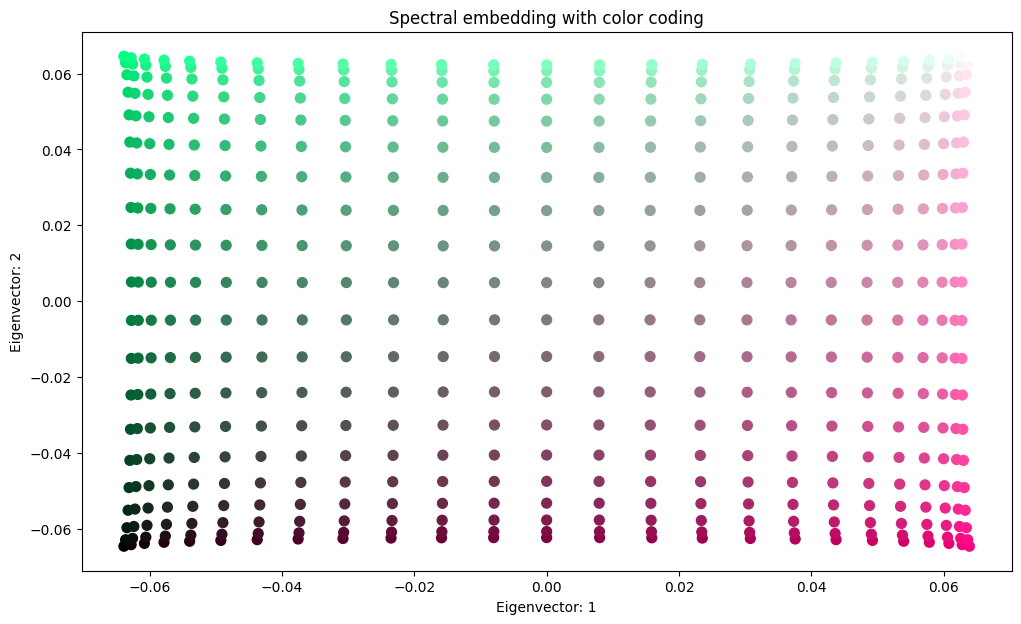

In [177]:
#Spectral Embedding using the second and third eigen vectors.
k1, k2 = 1, 2
plt.figure(figsize = (12,7))
plt.scatter(eigen_vector[:, k1], eigen_vector[:, k2], c = c, s = 50)
plt.title("Spectral embedding with color coding")
plt.xlabel(f'Eigenvector: {k1}')
plt.ylabel(f'Eigenvector: {k2}')
plt.show()



5. Now set $n_1$ =100, $n_2$ =10 and re-run the above code. $k_1$ = 1, $k_2$ = 2 now does no longer recover the two-dimensional grid structure. Find the best choices of $k_1$ and $k_2$ that do.


In [178]:
#Generating example dataset.
n1, n2 = 100, 10
x = np.linspace(0, n1-1, n1)
y = np.linspace(0, n2-1, n2)
xx, yy = np.meshgrid(x, y)
X = np.vstack([xx.ravel(), yy.ravel()]).T

#Computing the matrix of squared Euclidean distances
num_of_points = n1*n2 
D = np.zeros((num_of_points, num_of_points))

for i in range(num_of_points):
    for j in range(num_of_points):
        D[i,j] = np.sum((X[i] - X[j])**2)

#Compute the Affinity Matrix A
A = np.exp(-D / (epsilon**2))
np.fill_diagonal(A, 0)

#Compute the graph Laplacian L
Degree_matrix = np.diag(A.sum(axis =1))
L = Degree_matrix - A

#Compute the eigendecomposition of Laplacian
eigenval, eigenvec = eigh(L)

#Create the color encoding. 
c = np.zeros((n1 * n2, 3))

x_norm = (X[:, 0] - X[:, 0].min()) / (X[:, 0].max() - X[:,0].min())
y_norm = (X[:, 1] - X[:, 1].min()) / (X[:, 1].max() - X[:,1].min())

c[:, 0] = x_norm
c[:, 1] = y_norm
c[:, 2] = (x_norm + y_norm) / 2

Text(0, 0.5, 'Eigenvector 2')

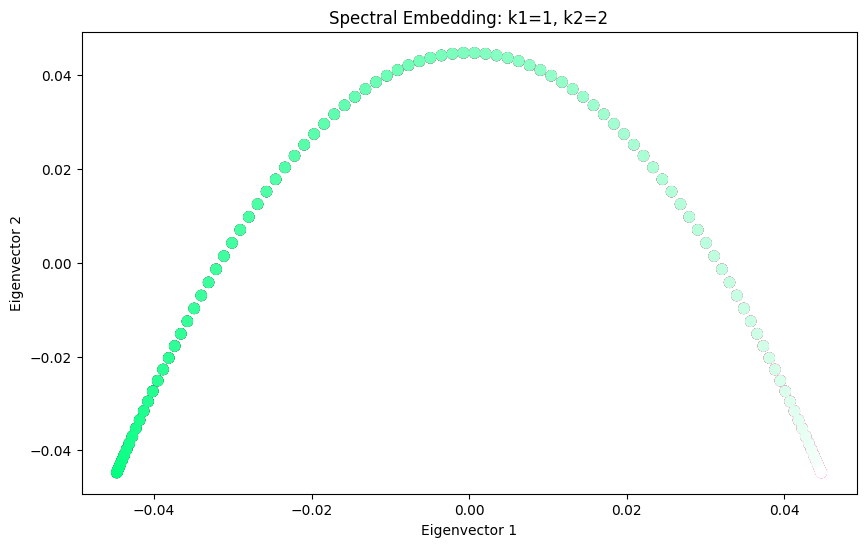

In [206]:
k1, k2 = 1,2
plt.figure(figsize=(10,6))
plt.scatter(eigenvec[:, k1], eigenvec[:, k2], c =c, s =50)
plt.title(f"Spectral Embedding: k1={k1}, k2={k2}")
plt.xlabel(f"Eigenvector {k1}")
plt.ylabel(f"Eigenvector {k2}")

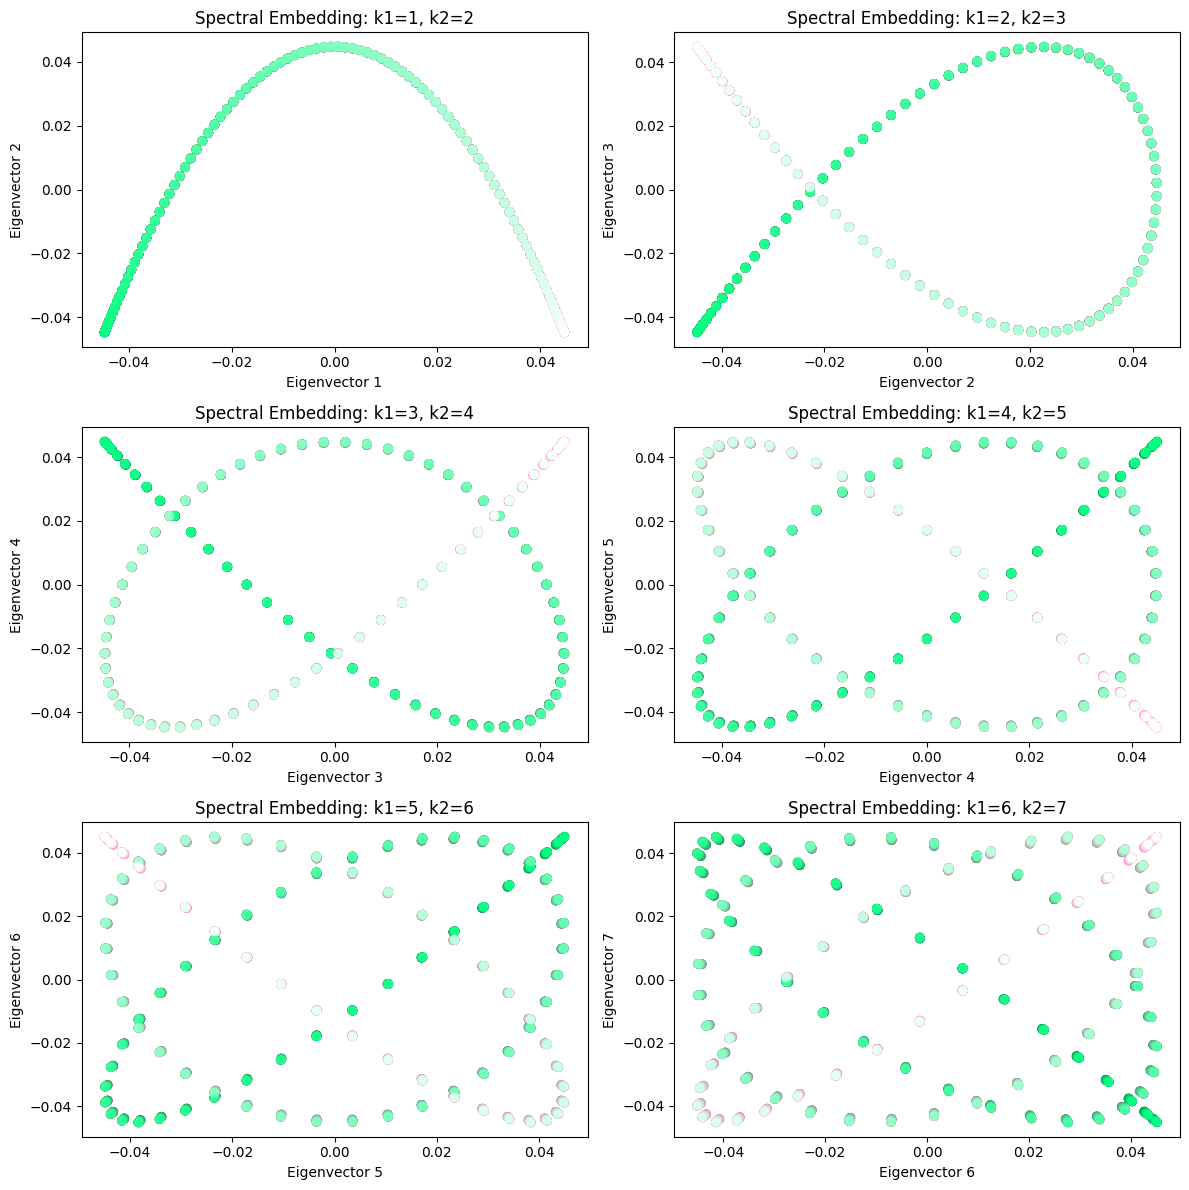

In [204]:
# Visualize spectral embedding for different k1 and k2
plt.figure(figsize=(12, 12))
for i, (k1, k2) in enumerate([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]):
    embedding = eigenvec[:, [k1, k2]]
    plt.subplot(3, 2, i + 1)
    plt.scatter(embedding[:, 0], embedding[:, 1], c =c)
    plt.title(f"Spectral Embedding: k1={k1}, k2={k2}")
    plt.xlabel(f"Eigenvector {k1}")
    plt.ylabel(f"Eigenvector {k2}")
plt.tight_layout()
plt.show()

Looking at the different graphs that are represented above, we can say that the best value of $k_1$ and $k_2$ that recover the two-dimensional grid structure is 5 and 6 respectively. 

## Exercise 8.2: Visualizing a relational database as decorated graph.

Consider a simple relational database that represents an online newspaper. $Journalists$ can author $articles$ (for simplicity, each article will be written by precisely one author) and articles can be $assigned$ to (multiple) $categories$. $Readers$ can create accounts and write $comments$ on articles, they can express $reactions$ to other readers' comments (such as 'agree' or 'disagree'), and they can $follow$ certain authors (to be automatically informed, when they publish a new article). Assume that each of the concepts above that were highlighted in $italics$ is represented by a separate table, and that relations between the concepts is encoded by simple key/foreign key references.

1. For each of the above tables, except for the $follow$ and $assignment$ tables, list at least two examples of columns that these tables should have (beyond keys and foreign keys).

In [211]:
def print_table_schema(table_name, columns):
    print(f"Table: {table_name}")
    print("-" * 50)
    print("| Column Name     | Description                     |")
    print("-" * 50)
    for column_name, description in columns.items():
        print(f"| {column_name:<15} | {description:<30} |")
    print("-" * 50)
    print()

# Define the schema for each table
schema = {
    'Journalists': {
        'journalist_id': 'Primary key',
        'name': 'Name of the journalist',
        'email': 'Email address of the journalist',
        'bio': 'Biography or description',
    },
    'Articles': {
        'article_id': 'Primary key',
        'journalist_id': 'Foreign Key referencing author',
        'title': 'Title of the article',
        'content': 'Full text or summary',
    },
    'Categories': {
        'category_id': 'Primary key',
        'article_id': 'Foreign Key referencing the article',
        'name': 'Name of the category',
        'description': 'Description of the category'
    },
    'Readers': {
        'reader_id': 'Primary key',
        'article_id': 'Foreign Key referencing article',
        'email': 'Email address',
    },
}

# Print each table schema
for table_name, columns in schema.items():
    print_table_schema(table_name, columns)


Table: Journalists
--------------------------------------------------
| Column Name     | Description                     |
--------------------------------------------------
| journalist_id   | Primary key                    |
| name            | Name of the journalist         |
| email           | Email address of the journalist |
| bio             | Biography or description       |
--------------------------------------------------

Table: Articles
--------------------------------------------------
| Column Name     | Description                     |
--------------------------------------------------
| article_id      | Primary key                    |
| journalist_id   | Foreign Key referencing author |
| title           | Title of the article           |
| content         | Full text or summary           |
--------------------------------------------------

Table: Categories
--------------------------------------------------
| Column Name     | Description                     |
-

2. Draw a graph that represents the above database, in particular the table columns and reference relations. Possibly you can choose a separate visual representation for the relations encoded by the auxiliary tables $follow$ and $assigned$. You can do this in any software you want, or with a simple hand drawing (scanned or on a tablet).

(-0.5, 1356.5, 1371.5, -0.5)

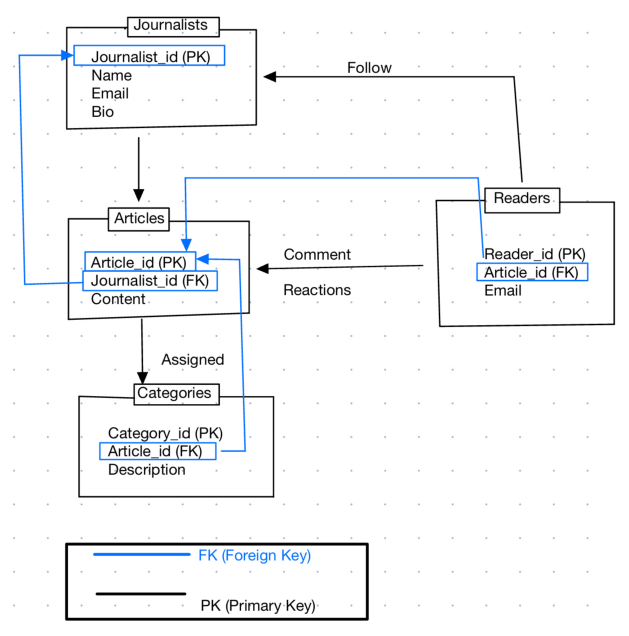

In [228]:
image_path = 'Graph_representation_database.jpeg'
image = Image.open(image_path)
plt.figure(figsize=  (12,8))
plt.imshow(image)
plt.axis('off')